Example 4: Linear Discriminant Analysis
In this example we look at how linear discriminant analysis works with different data distributions.

In [1]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

In [2]:
# define function for creating & plotting synthetic data set
def generate_2class_data(class1Mean, class1Cov, class2Mean, class2Cov, plot=True):
    
    np.random.seed(1)
    class1x = np.random.multivariate_normal(class1Mean, class1Cov, 100)
    class1y = np.zeros(100)
    class2x = np.random.multivariate_normal(class2Mean, class2Cov, 100)
    class2y = np.ones(100)
    
    X = np.concatenate((class1x, class2x), axis=0)
    y = np.concatenate((class1y, class2y))

    # Plotting the 2-class data
    if(plot):
        plt.title('Plotting 2-dimensional 2-class data')
        plt.scatter(class1x[:,0], class1x[:,1], color = 'b', label = 'Class 0')
        plt.scatter(class2x[:,0], class2x[:,1], color = 'r', label = 'Class 1')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()
        
    return X,y

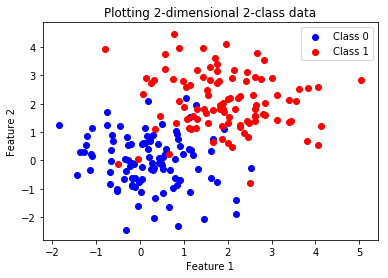

In [3]:
# first data set - covariance matrices are the same for both classes
class1Mean = [0, 0]
class2Mean = [2, 2]

class1Cov = [[1, 0], [0, 1]]
class2Cov = [[1, 0], [0, 1]]

X, y = generate_2class_data( class1Mean, class1Cov, class2Mean, class2Cov)


In [4]:
# applying LDA
clf = LinearDiscriminantAnalysis( solver = 'lsqr' )
clf.fit(X, y)

# model estimated parameters
print( 'Mean: ' )
print( clf.means_ )
print( 'Covariance: ' )
print( clf.covariance_)

Mean: 
[[ 0.22665544 -0.01327782]
 [ 1.9239746   2.06548483]]
Covariance: 
[[ 0.9283381  -0.1107471 ]
 [-0.1107471   0.95210951]]


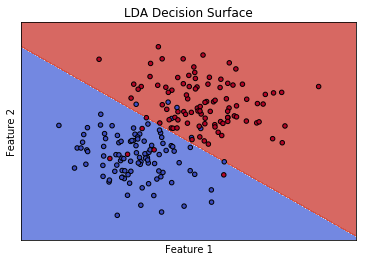

In [5]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# plotting decision surface

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

ax = plt.gca()
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('LDA Decision Surface')
plt.show()

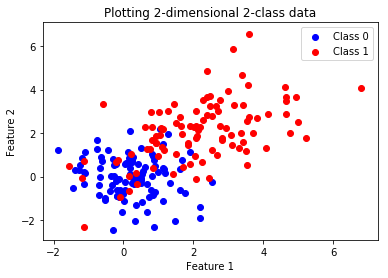

In [6]:
# second data set - covariance matrices are different
class1Mean = [0, 0]
class2Mean = [2, 2]

class1Cov = [[1, 0], [0, 1]]
class2Cov = [[1, 2], [2, 1]]

X, y = generate_2class_data( class1Mean, class1Cov, class2Mean, class2Cov)

In [7]:
# applying LDA
clf = LinearDiscriminantAnalysis( solver = 'lsqr')
clf.fit(X, y)
params = clf.get_params()

# model estimated parameters
print( 'Mean: ' )
print( clf.means_ )
print( 'Covariance: ' )
print( clf.covariance_)

Mean: 
[[ 0.22665544 -0.01327782]
 [ 2.13941649  2.04680696]]
Covariance: 
[[1.55436704 0.52805791]
 [0.52805791 1.4446926 ]]


In [8]:
# plotting decision surface

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

ax = plt.gca()
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('LDA Decision Surface')
plt.show()

In [9]:
# third data set - mixture of Gaussians
class1G1Mean = [0, 0]
class1G2Mean = [-2, 2]
class1G1Cov = [[1, 0], [0,1]]
class1G2Cov = [[1, 0], [0,1]]

class2G1Mean = [3, 3]
class2G2Mean = [6, 0]
class2G3Mean = [3, -3]
class2G1Cov = [[1, 0], [0,1]]
class2G2Cov = [[1, 0], [0,1]]
class2G3Cov = [[1, 0], [0,1]]

np.random.seed(1)
class1G1x = np.random.multivariate_normal(class1G1Mean, class1G1Cov, 100)
class1G2x = np.random.multivariate_normal(class1G2Mean, class1G2Cov, 75)
class1y = np.zeros(175)
class2G1x = np.random.multivariate_normal(class2G1Mean, class2G1Cov, 75)
class2G2x = np.random.multivariate_normal(class2G2Mean, class2G2Cov, 50)
class2G3x = np.random.multivariate_normal(class2G3Mean, class2G3Cov, 50)
class2y = np.ones(175)

class1x = np.concatenate((class1G1x, class1G2x), axis = 0)
class2x = np.concatenate((class2G1x, class2G2x, class2G3x), axis = 0)

X = np.concatenate((class1x, class2x), axis=0)
y = np.concatenate((class1y, class2y))

# Plotting the 2-class data

plt.title('Plotting 2-dimensional 2-class data')
plt.scatter(class1x[:,0], class1x[:,1], color = 'b', label = 'Class 0')
plt.scatter(class2x[:,0], class2x[:,1], color = 'r', label = 'Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [10]:
# applying LDA
clf = LinearDiscriminantAnalysis( solver = 'lsqr')
clf.fit(X, y)
params = clf.get_params()
beta = clf.coef_
print(beta.shape)
# model estimated parameters
print( 'Mean: ' )
print( clf.means_ )
print( 'Covariance: ' )
print( clf.covariance_)

(1, 2)
Mean: 
[[-0.74435503  0.86260516]
 [ 3.81334913  0.54569133]]
Covariance: 
[[ 2.55392931 -0.78565843]
 [-0.78565843  4.80477584]]


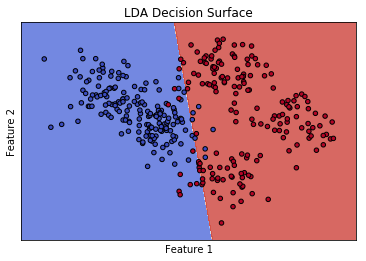

In [11]:
# plotting decision surface

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

ax = plt.gca()
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('LDA Decision Surface')
plt.show()

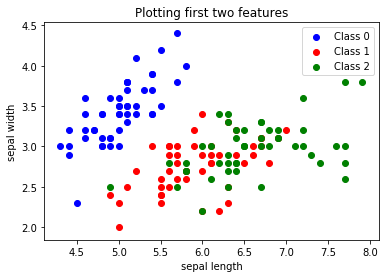

In [12]:
# fourth data set - iris data set

# loading iris dataset
iris = datasets.load_iris()

# considering the first two features
X = iris.data[:, :2]
y = iris.target

# plotting the data
plt.title('Plotting first two features')
plt.scatter(X[0:49,0], X[0:49,1], color = 'b', label = 'Class 0')
plt.scatter(X[50:99,0], X[50:99,1], color = 'r', label = 'Class 1')
plt.scatter(X[100:149,0], X[100:149,1], color = 'g', label = 'Class 2')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

In [13]:
# applying LDA
clf = LinearDiscriminantAnalysis( solver = 'lsqr')
clf.fit(X, y)
params = clf.get_params()

# model estimated parameters
print( 'Mean: ' )
print( clf.means_ )
print( 'Covariance: ' )
print( clf.covariance_)

Mean: 
[[5.006 3.428]
 [5.936 2.77 ]
 [6.588 2.974]]
Covariance: 
[[0.259708   0.09086667]
 [0.09086667 0.11308   ]]


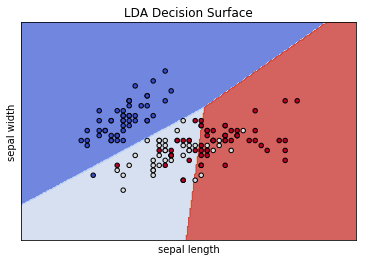

In [14]:
# plotting decision surface

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

ax = plt.gca()
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('LDA Decision Surface')
plt.show()

In [15]:
X=[[1,1],[2,3],[2,4],[5,3],[8,6],[8,8],[9,6],[11,7]]
y=[1,1,1,1,0,0,0,0]
# applying LDA
clf = LinearDiscriminantAnalysis( solver = 'lsqr' )
clf.fit(X, y)

# model estimated parameters
print( 'Mean: ' )
print( clf.means_ )
print( 'Covariance: ' )
print( clf.covariance_)

Mean: 
[[9.   6.75]
 [2.5  2.75]]
Covariance: 
[[1.875  0.3125]
 [0.3125 0.9375]]


In [16]:
import statistics
import pandas as pd
import math

def generate_2d_data(class1Mean, class1Cov, class2Mean, class2Cov):
    
    np.random.seed(1)
    class1x = np.random.multivariate_normal(class1Mean, class1Cov, 100)
    class1y = np.zeros(100)
    class2x = np.random.multivariate_normal(class2Mean, class2Cov, 100)
    class2y = np.ones(100)
    x = np.concatenate((class1x, class2x), axis=0)
    y = np.concatenate((class1y, class2y))

    # Plotting the 2-class data
    plt.title('Plotting 2-dimensional 2-class data')
    plt.scatter(class1x[:,0], class1x[:,1], color = 'b', label = 'Class 1')
    plt.scatter(class2x[:,0], class2x[:,1], color = 'r', label = 'Class 2')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()
    
    return x,y


X=pd.DataFrame([[105,68],[99,73],[112,57],[102,77],[116,23],[131,18],[129,28],[121,31]])
cov = X.cov()
X = np.array([[105,68],[99,73],[112,57],[102,77],[116,23],[131,18],[129,28],[121,31]])
y=[0,0,0,0,1,1,1,1]

print(statistics.mean(X[:4,0]))
mean11 = statistics.mean(X[:4,0])
mean12 = statistics.mean(X[:4,1])
mean21 = statistics.mean(X[4:,0])
mean21 = statistics.mean(X[4:,1])
print(X[1,0])
print(math.sqrt(((X[0,0]-mean11)**2+(X[1,0]-mean11)**2+(X[2,0]-mean11)**2+(X[3,0]-mean11)**2+
        (X[4,0]-mean21)**2++(X[5,0]-mean21)**2+(X[6,0]-mean21)**2+(X[7,0]-mean21)**2)/6))
# model estimated parameters
print( 'Mean: ' )
print( clf.means_ )
print( 'Covariance: ' )
print( clf.covariance_)

104
99
81.2844798634196
Mean: 
[[9.   6.75]
 [2.5  2.75]]
Covariance: 
[[1.875  0.3125]
 [0.3125 0.9375]]


In [17]:
classCount = len(X)
print(classCount)

8
